In [ ]:
train_path = 'train'
test_path = "test"


train_datagen=ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)
val_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    shuffle=True,
    class_mode='categorical',
    batch_size=128,
    subset='training'
)

val_generator=val_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    shuffle=False,
    class_mode='categorical',
    batch_size=128,
    subset='validation'
)


test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    shuffle=True,
    class_mode='categorical',
    batch_size=1
)

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras import layers
from keras.models import Sequential, Model
from keras.optimizers import Adam, RMSprop
from keras.applications import VGG16
from keras.utils.np_utils import to_categorical
from keras.layers import  Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
import tensorflow as tf
vgg = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
for layer in vgg.layers:
    layer.trainable = False 
    
x = Flatten()(vgg.output) 
x=Dense(512,activation='relu')(x)
predictions = Dense(3,activation='softmax')(x) 
model = Model(inputs=vgg.input, outputs=predictions)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples//128,
    validation_data = val_generator,
    epochs = 10,
    validation_steps = val_generator.samples//128
)


Epoch 1/10
36/36 [==============================] - 835s 23s/step - loss: 2.8924 - accuracy: 0.5213 - val_loss: 0.5379 - val_accuracy: 0.7520
Epoch 2/10
36/36 [==============================] - 823s 23s/step - loss: 0.5952 - accuracy: 0.7447 - val_loss: 0.4142 - val_accuracy: 0.8477
Epoch 3/10
36/36 [==============================] - 893s 25s/step - loss: 0.5580 - accuracy: 0.7650 - val_loss: 0.4587 - val_accuracy: 0.8496
Epoch 4/10
36/36 [==============================] - 812s 23s/step - loss: 0.5596 - accuracy: 0.7528 - val_loss: 0.4613 - val_accuracy: 0.7910
Epoch 5/10
36/36 [==============================] - 800s 22s/step - loss: 0.5648 - accuracy: 0.7475 - val_loss: 0.4186 - val_accuracy: 0.8789
Epoch 6/10
36/36 [==============================] - 780s 22s/step - loss: 0.4922 - accuracy: 0.7853 - val_loss: 0.3759 - val_accuracy: 0.8809
Epoch 7/10
36/36 [==============================] - 833s 23s/step - loss: 0.5166 - accuracy: 0.7720 - val_loss: 0.3417 - val_accuracy: 0.8750
Epoch 

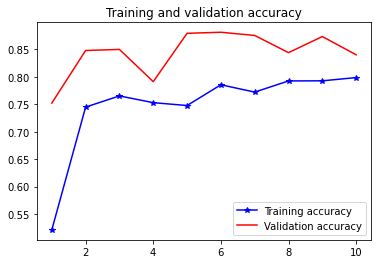

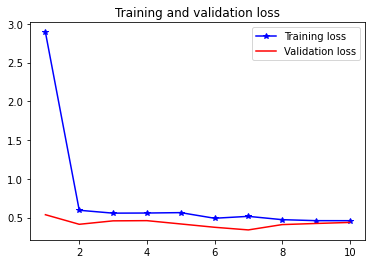

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict_generator(generator=test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
target_names = ['class1', 'class 2', 'class 3']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      class1       0.34      0.32      0.33       234
     class 2       0.38      0.45      0.41       242
     class 3       0.23      0.18      0.20       148

    accuracy                           0.34       624
   macro avg       0.32      0.32      0.32       624
weighted avg       0.33      0.34      0.33       624



In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_generator(generator=test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
cm=confusion_matrix(y_true,y_pred)

print(cm)

[[ 77 113  44]
 [ 85 116  41]
 [ 60  53  35]]
